<a href="https://colab.research.google.com/github/AkoaC/AkoaC-Projet-Data-science/blob/main/car_price_multiple_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Librarie

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.metrics import mean_squared_error, r2_score


# Reading and Understanding the data

In [ ]:
df = pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Exploratory Data Analysis

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

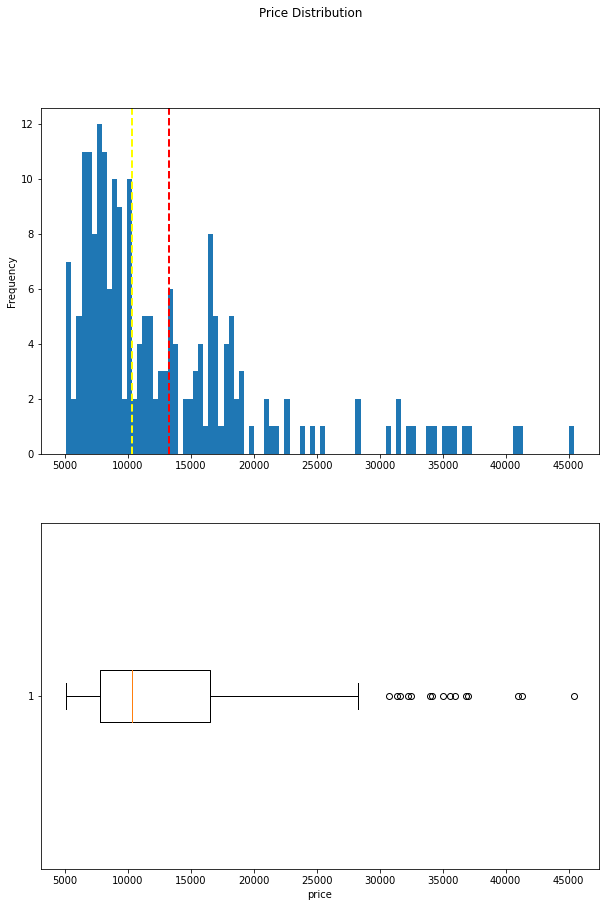

In [ ]:
# Get the label column
label = df["price"]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (10,14))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='yellow', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('price')

# Add a title to the Figure
fig.suptitle('Price Distribution')

# Show the figure
fig.show()

In [ ]:
cat_features = []
numeric_features = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat_features.append(i)
    else:
        numeric_features.append(i)

CAR_ID


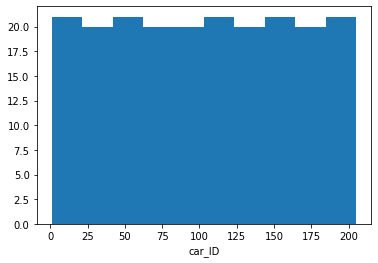

SYMBOLING


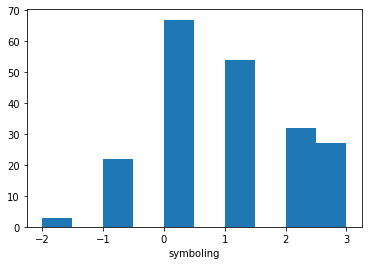

WHEELBASE


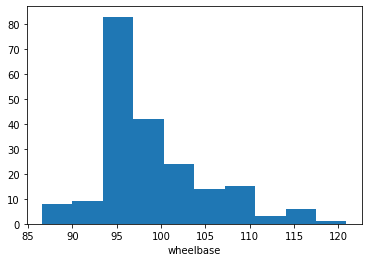

CARLENGTH


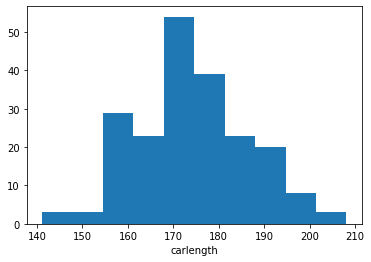

CARWIDTH


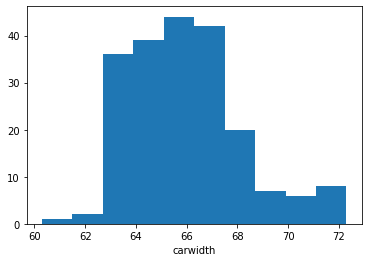

CARHEIGHT


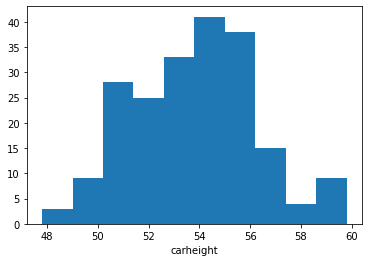

CURBWEIGHT


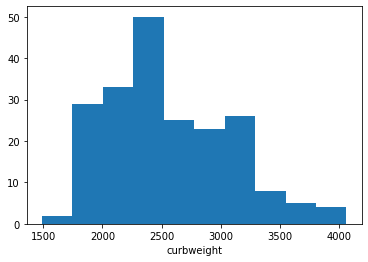

ENGINESIZE


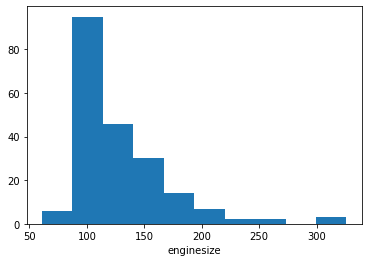

BORERATIO


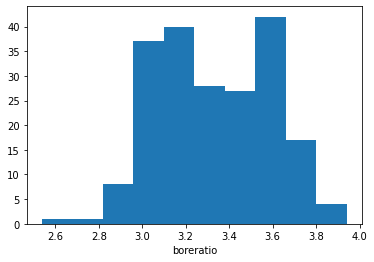

STROKE


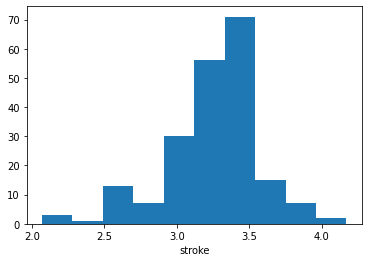

COMPRESSIONRATIO


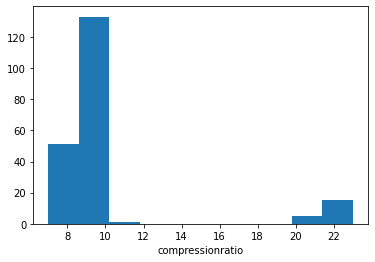

HORSEPOWER


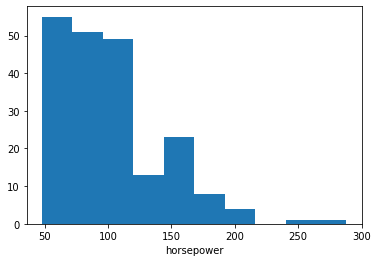

PEAKRPM


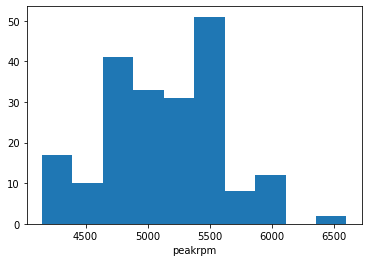

CITYMPG


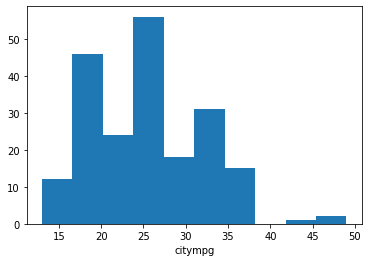

HIGHWAYMPG


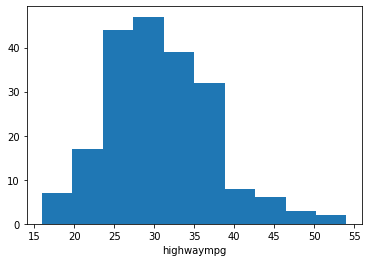

PRICE


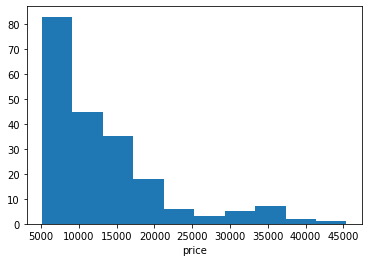

In [ ]:
for i in numeric_features:
    print(i.upper())
    #ploting the graph
    plt.hist(x= df[i] )
    plt.xlabel(i)
    plt.show()

price vs symboling- correlation: -0.07997822464270347


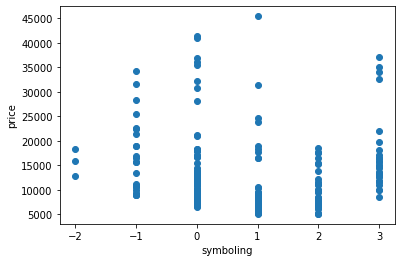

price vs wheelbase- correlation: 0.5778155982921496


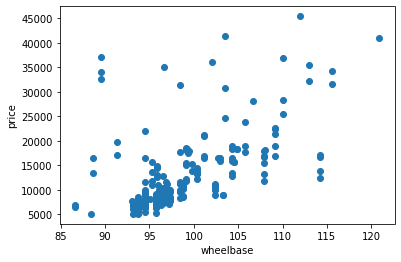

price vs carlength- correlation: 0.6829200156779629


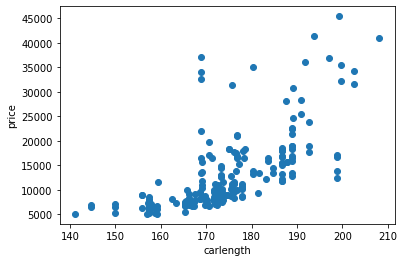

price vs carwidth- correlation: 0.7593252997415118


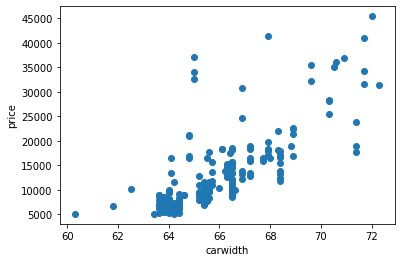

price vs carheight- correlation: 0.11933622657049436


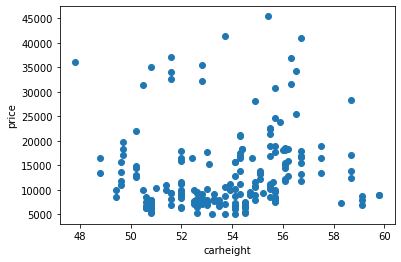

price vs curbweight- correlation: 0.8353048793372965


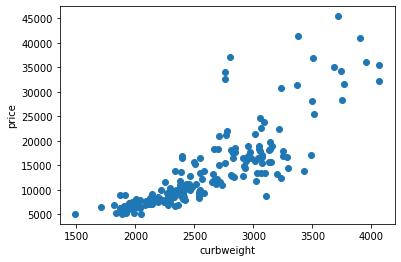

price vs enginesize- correlation: 0.8741448025245112


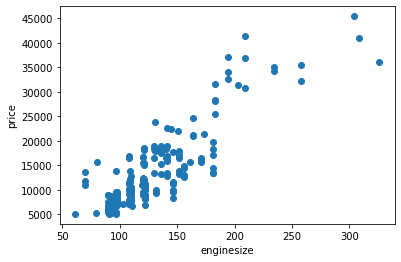

price vs boreratio- correlation: 0.5531732367984434


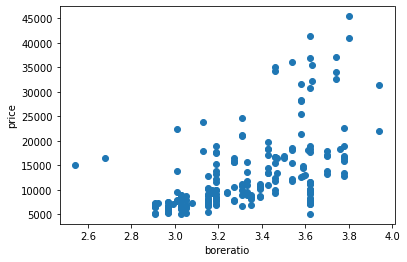

price vs stroke- correlation: 0.079443083881931


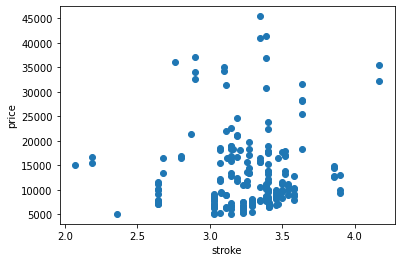

price vs compressionratio- correlation: 0.06798350579944265


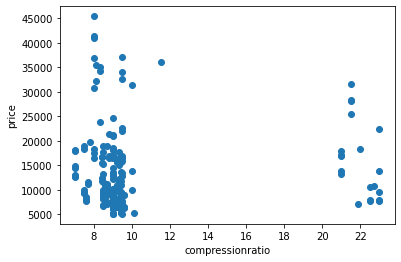

price vs horsepower- correlation: 0.8081388225362212


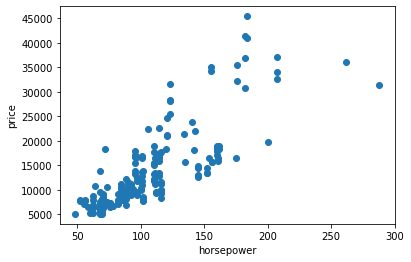

price vs peakrpm- correlation: -0.08526715027785685


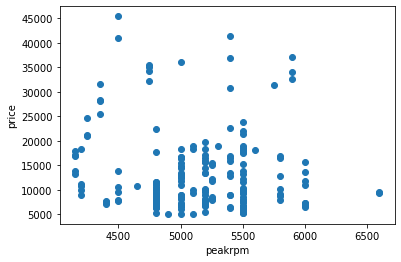

price vs citympg- correlation: -0.6857513360270401


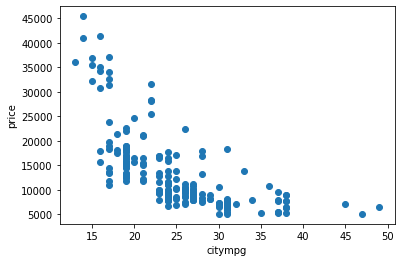

price vs highwaympg- correlation: -0.6975990916465566


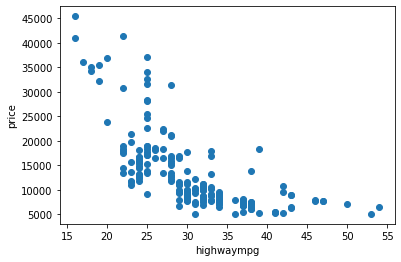

price vs price- correlation: 1.0


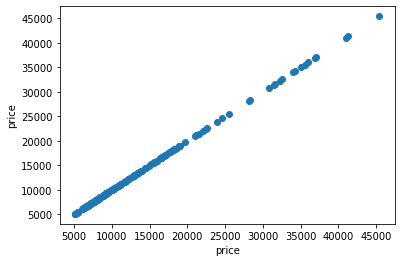

In [ ]:
numeric_features.remove('car_ID')
# Scatter plot for Numerical Columns
for i in numeric_features:
    feature = df[i]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(i)
    plt.ylabel('price')
    print('price vs ' + i + '- correlation: ' + str(correlation))
    plt.show()
    

Boxplot for  CarName


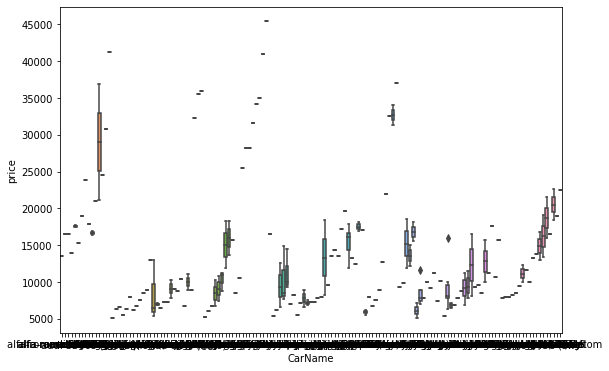

Boxplot for  fueltype


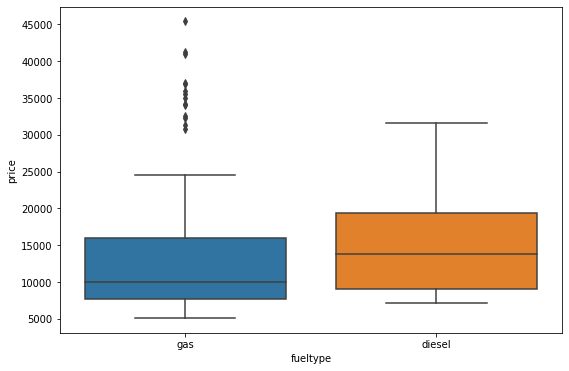

Boxplot for  aspiration


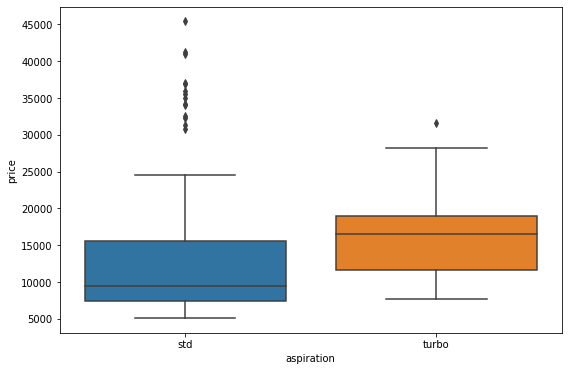

Boxplot for  doornumber


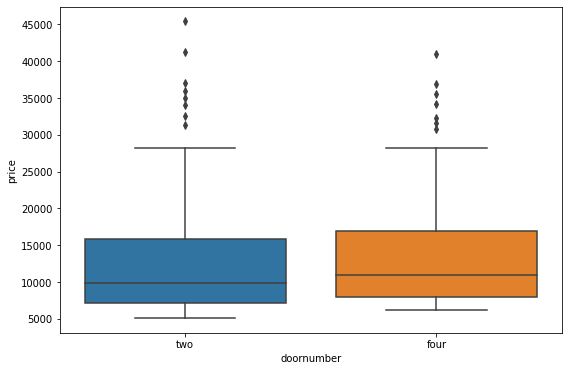

Boxplot for  carbody


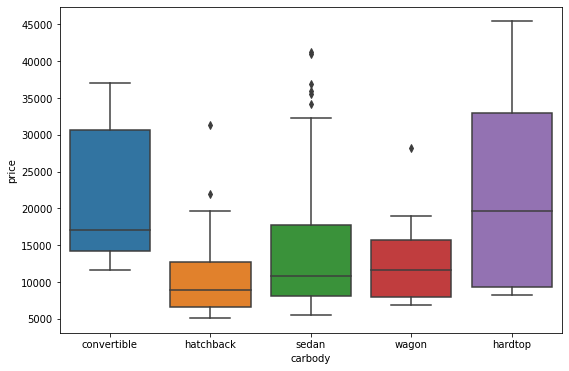

Boxplot for  drivewheel


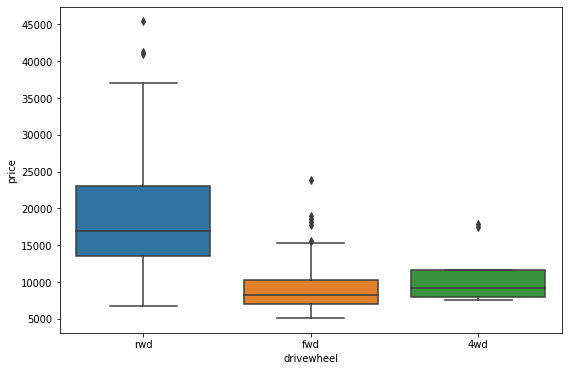

Boxplot for  enginelocation


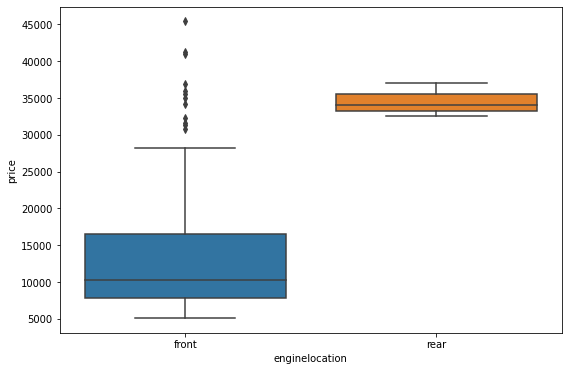

Boxplot for  enginetype


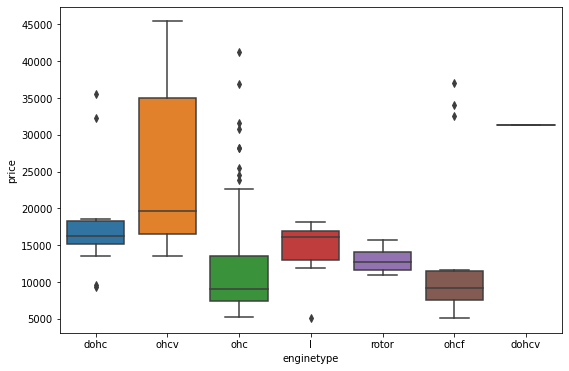

Boxplot for  cylindernumber


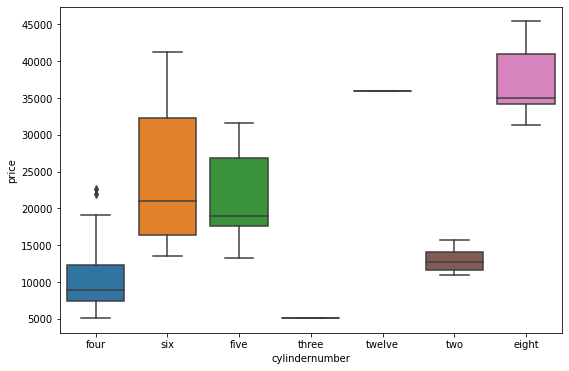

Boxplot for  fuelsystem


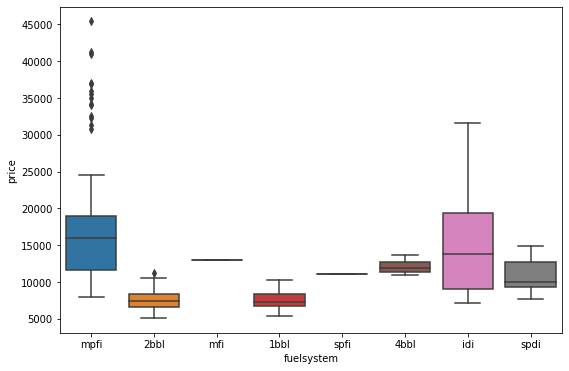

In [ ]:
# plot a boxplot for the label by each categorical features

for i in cat_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    print("Boxplot for ",i)
    sns.boxplot(x = df[i], y = label, ax = ax)
    #ax.set_title('Label by ' + col)
    plt.show()

# Data Preprocessing

We encode qualitative values ​​using an OrdinalEncoder.

In [ ]:
data = df.copy()
data = data.drop(["car_ID","CarName"], axis=1)

In [ ]:
#Encoding
le = LabelEncoder()

In [ ]:
data['fueltype'] = le.fit_transform(data['fueltype'])
data['fueltype'] = data['fueltype'].astype(float)

data['aspiration'] = le.fit_transform(data['aspiration'])
data['aspiration'] = data['aspiration'].astype(float)

data['doornumber'] = le.fit_transform(data['doornumber'])
data['doornumber'] = data['doornumber'].astype(float)

data['carbody'] = le.fit_transform(data['carbody'])
data['carbody'] = data['carbody'].astype(float)

data['drivewheel'] = le.fit_transform(data['drivewheel'])
data['drivewheel'] = data['drivewheel'].astype(float)

data['enginelocation'] = le.fit_transform(data['enginelocation'])
data['enginelocation'] = data['enginelocation'].astype(float)

data['enginetype'] = le.fit_transform(data['enginetype'])
data['enginetype'] = data['enginetype'].astype(float)

data['cylindernumber'] = le.fit_transform(data['cylindernumber'])
data['cylindernumber'] = data['cylindernumber'].astype(float)

data['fuelsystem'] = le.fit_transform(data['fuelsystem'])
data['fuelsystem'] = data['fuelsystem'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    float64
 2   aspiration        205 non-null    float64
 3   doornumber        205 non-null    float64
 4   carbody           205 non-null    float64
 5   drivewheel        205 non-null    float64
 6   enginelocation    205 non-null    float64
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    float64
 13  cylindernumber    205 non-null    float64
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    float64
 16  boreratio         205 non-null    float64
 1

# Splitting data into train and test

In [ ]:
# Separate features
X, y = data.drop(["price"], axis=1).values, data["price"].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [ ]:
print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 143, rows
Test Set: 62 rows


# Data Scaling using Robust Scaler

In [ ]:
ro_scaler = RobustScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)

# Linear Regression Models

In [ ]:
le = LinearRegression()
model = le.fit(X_train, y_train)
print(model)

LinearRegression()


In [ ]:
le.score(X_train, y_train)


0.9042523769513593

In [ ]:
le.score(X_test, y_test)

0.779682804328183

MSE : 14549168.27582252
RMSE: 3814.337200067991
R2: 0.779682804328183


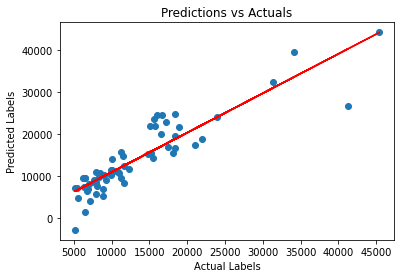

In [ ]:
#Get prediction
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE :",mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

# Decision Tree 

In [ ]:
# Train the model
De = DecisionTreeRegressor()
model_1 = De.fit(X_train, y_train)
print (model_1, "\n")

# Visualize the model tree
#tree = export_text(model_1)
#print(tree)

DecisionTreeRegressor() 



MSE: 23938102.97983871
RMSE: 4892.658068968105
R2: 0.6375067207803622


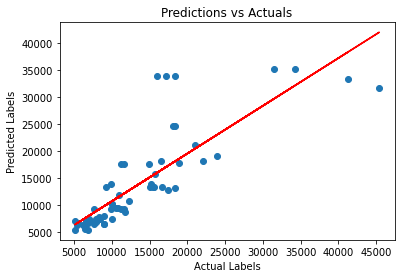

In [ ]:
# Evaluate the model using the test data
predictions_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, predictions_1)
print("MSE:", mse_1)
rmse_1 = np.sqrt(mse_1)
print("RMSE:", rmse_1)
r2_1 = r2_score(y_test, predictions_1)
print("R2:", r2_1)

# Plot predicted vs actual
plt.scatter(y_test, predictions_1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
# overlay the regression line
z = np.polyfit(y_test, predictions_1, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

# Random Forest model

In [ ]:
model_2 = RandomForestRegressor().fit(X_train, y_train)
print (model_2, "\n")

RandomForestRegressor() 



MSE: 16918985.96399821
RMSE: 4113.269498099804
R2: 0.7437967950791204


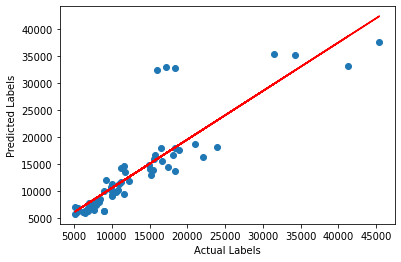

In [ ]:
# Evaluate the model using the test data
predictions_2 = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, predictions_2)
print("MSE:", mse_2)
rmse_2 = np.sqrt(mse_2)
print("RMSE:", rmse_2)
r2_2 = r2_score(y_test, predictions_2)
print("R2:", r2_2)

# Plot predicted vs actual
plt.scatter(y_test, predictions_2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions_2, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()